In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

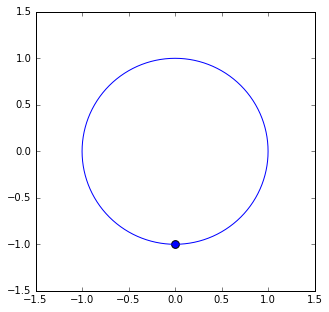

In [3]:
theta = np.arange(-90, 270, 1)

# sun-centered orbit
x = np.cos(theta / 180. * np.pi)
y = np.sin(theta / 180. * np.pi)

plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.scatter(x[0], y[0], s=60)

(2008, 2070)

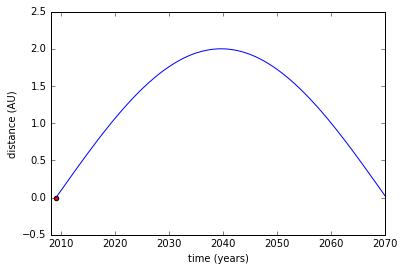

In [4]:
# earth-centered, we always at (0, -1)
dist = np.sqrt(x**2 + (y+1)**2)

# approx 61 years for Kepler to catch back up with us...
time = np.linspace(0, 61, 360)+2009

plt.plot(time, dist)
plt.scatter(time[0], dist[0], c='red')
plt.xlabel('time (years)')
plt.ylabel('distance (AU)')
plt.xlim(2008,2070)

# an absurdly rough approximation...

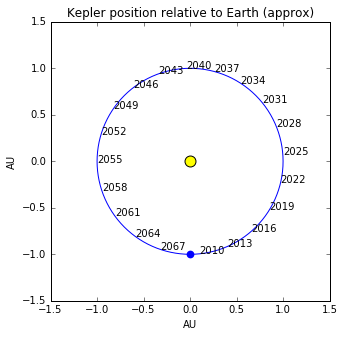

In [39]:
xk = np.interp(np.arange(0, 61, 1)+2009, time, x)
yk = np.interp(np.arange(0, 61, 1)+2009, time, y)

plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.scatter(x[0], y[0], s=60, lw=0, c='blue') # earth
plt.scatter([0], [0], s=120, c='yellow') # sun
for k in range(1, len(xk), 3):
    plt.text(xk[k],yk[k], str(2009+k))
plt.title("Kepler position relative to Earth (approx)")
plt.xlabel('AU')
plt.ylabel('AU')

plt.savefig('how-far.png', dpi=150)

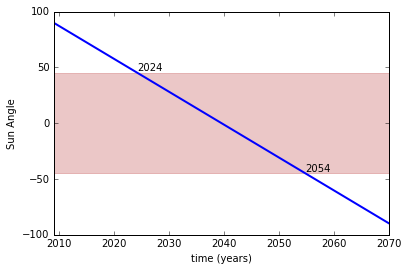

In [37]:
# How long until we can't look back at the Earth?
# K2 mission says we can't be closer than 45deg to the Sun

# Trig time! law of Sines:
# sin A / a = sin B / b
# A = theta, a = dist
# B = Sun Angle, b == 1 AU
sun_angle = (np.arcsin( np.sin((theta + 90.) / 180. * np.pi) / dist ) * 180. / np.pi)

plt.plot(time[1:], sun_angle[1:],lw=2)
plt.fill_between([min(time), max(time)], [45,45], [-45,-45], color='firebrick', alpha=0.25)
plt.xlabel('time (years)')
plt.ylabel('Sun Angle')
plt.xlim(min(time), max(time))

plt.text(time[90], sun_angle[90]+2, str(int(time[90])))
plt.text(time[270], sun_angle[270]+2, str(int(time[270])))